# Decision Tree - Regression

## Preliminaries

In [10]:
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

## Read [boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) data

In [11]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [12]:
print(X.shape, y.shape)

(506, 13) (506,)


## Decision Tree Regressor

### Model

In [13]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
regr = regr.fit(X, y)

### Feature importance

In [14]:
for i in range(len( regr.feature_importances_)):
    print(F"{feature_names[i]}: \t{regr.feature_importances_[i]}")

CRIM: 	0.032542485937421144
ZN: 	0.0
INDUS: 	0.0
CHAS: 	0.0
NOX: 	0.028824402964535267
RM: 	0.6412409777650392
AGE: 	0.0
DIS: 	0.07214729872576148
RAD: 	0.0
TAX: 	0.0
PTRATIO: 	0.015934474034408067
B: 	0.0
LSTAT: 	0.20931036057283484


## Visualize the tree

As text

In [15]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



Save to file

In [16]:
with open("decistion_tree_reg.txt", "w") as fout:
    fout.write(text_representation)

Plot the tree

In [8]:
%pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


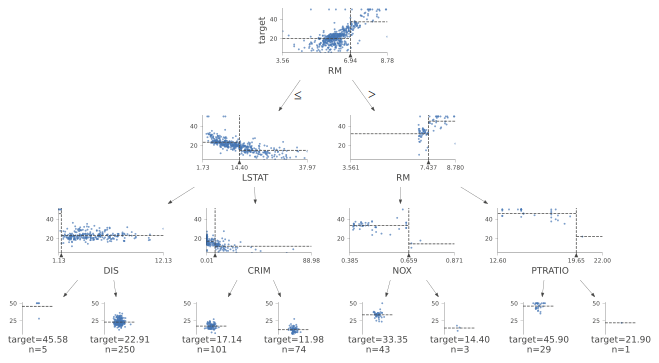

In [17]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr, X, y,
                target_name="target",
                feature_names=feature_names)

viz